# 2D random walk, isotropic

Idea borrowed from: https://www.coursera.org/learn/modeling-simulation-natural-processes

In order to make anisotropic walk, one can modify the line

```
   vxvy=stepchoice[np.random.randint(low=0,high=5)] #high exclusive
```




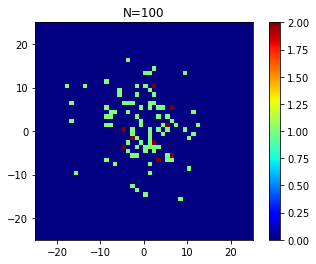

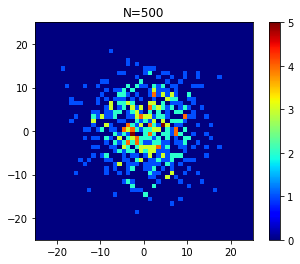

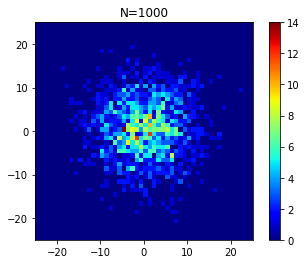

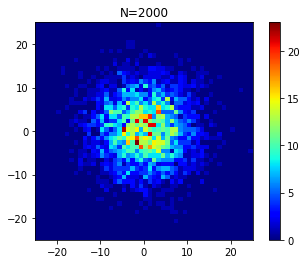

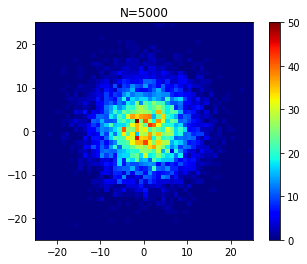

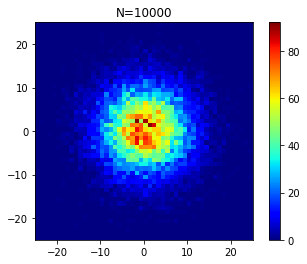

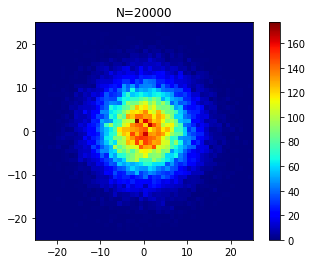

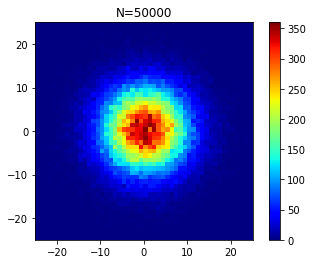

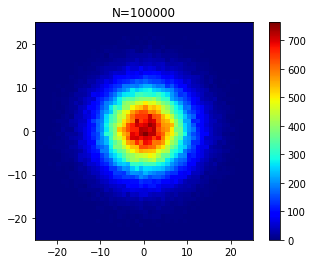

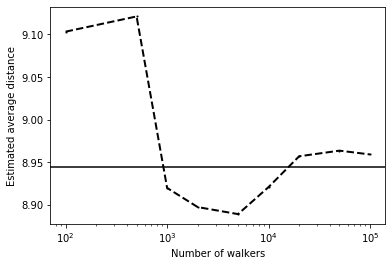

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dx=1.
dy=1.
dt=1.

stepchoice=[(dx/dt,0.),(-dx/dt,0.),(0.,0.),(0.,dy/dt),(0.,-dy/dt)]

xend=[]
yend=[]
dists=[]
for N in [100,500,1000,2000,5000,10000,20000,50000,100000]:
    for _ in range(N):
        x=0.0
        y=0.0
        for _ in range(100):
            vxvy=stepchoice[np.random.randint(low=0,high=5)] #high exclusive
            x=x+dt*vxvy[0]
            y=y+dt*vxvy[1]
        xend.append(x)
        yend.append(y)
    dists.append((np.sqrt(np.mean(np.array(xend)**2)+np.mean(np.array(yend)**2))))
    
    plt.figure()
    plt.title('N=%d'%N)
    plt.hist2d(xend,yend,[np.linspace(-25,25,51),np.linspace(-25,25,51)],cmap='jet')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()
#    plt.savefig('randomwalk_stochastic%d.png'%N,dpi=150)
    plt.show()

plt.figure()
plt.semilogx([100,500,1000,2000,5000,10000,20000,50000,100000],dists,'kx--',lw=2,ms=1.5)
plt.axhline(np.sqrt(80),color='k')
plt.xlabel('Number of walkers')
plt.ylabel('Estimated average distance')
#plt.savefig('randomwalk_distance.png',dpi=150)
plt.show()

# Deterministic solution

from http://csci.ucsd.edu/courses/cogs260w2018/files/lecture-03/Lecture3_Readings_Chap23.pdf



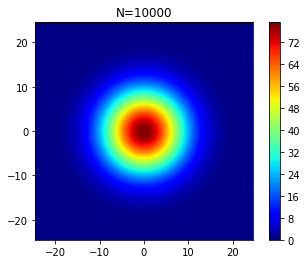

In [2]:
def p(x,y):
    D=1/5  #hard coded now...
    sig2=2*D*100
    return (1/(2*np.pi*sig2))*np.exp(-(x**2+y**2)/(2*sig2))
                                     
x=np.linspace(-24.5,24.5,50)
y=np.linspace(-24.5,24.5,50)
X,Y=np.meshgrid(x,y)
plt.contourf(X,Y,p(X,Y)*20000,cmap='jet',levels=100)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.title('N=%d'%10000)

#plt.savefig('randomwalk_deterministic10000.png',dpi=150)
plt.show()

# Random Walkers animation

animate couple of walkers. It could be further improved by setting arrows at the end, or to highlight in some way if the walker is stay put.

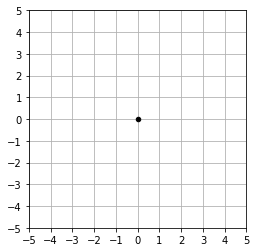

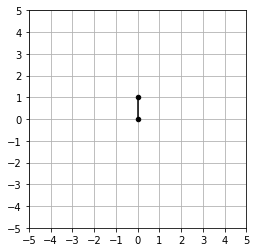

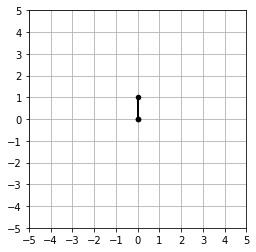

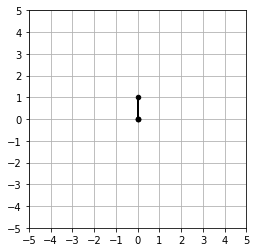

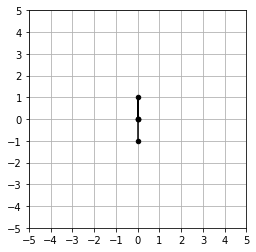

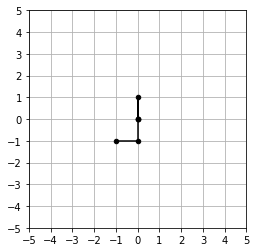

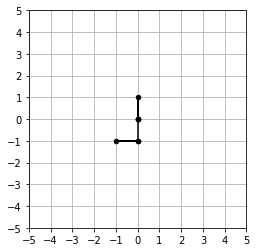

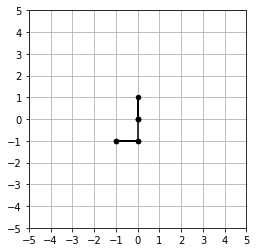

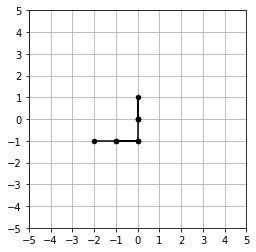

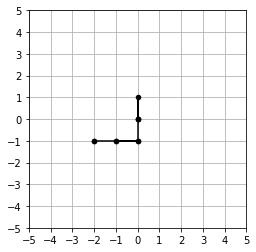

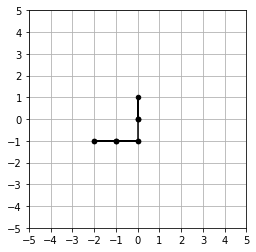

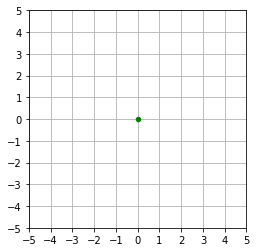

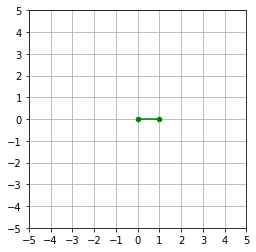

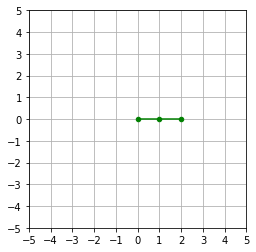

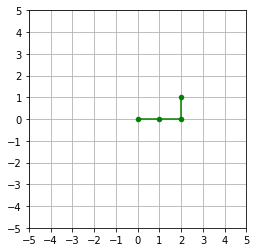

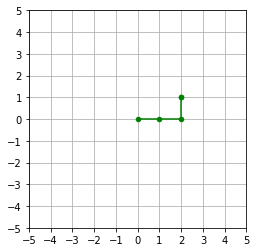

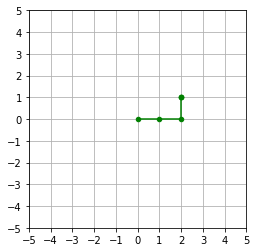

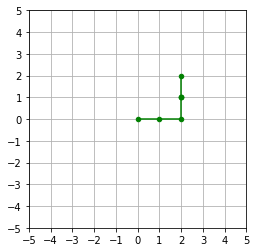

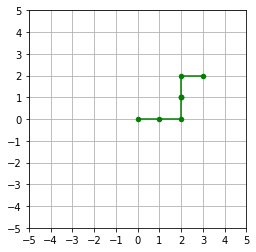

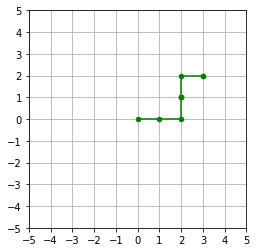

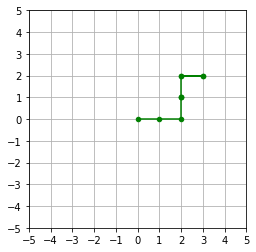

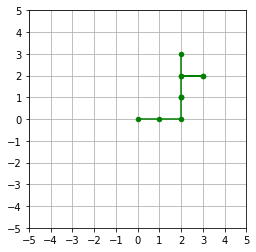

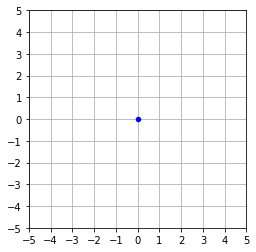

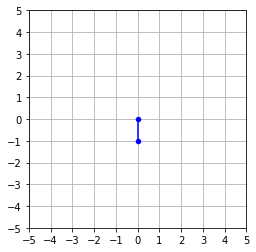

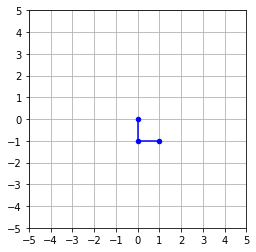

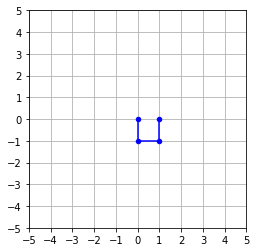

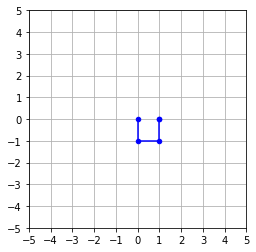

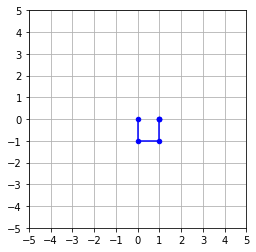

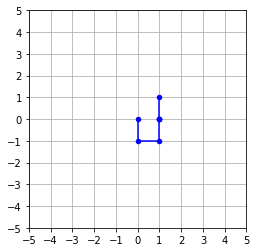

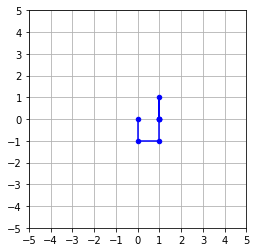

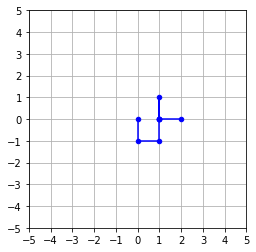

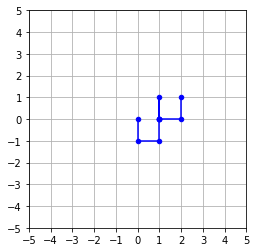

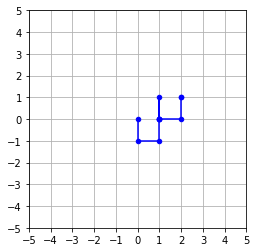

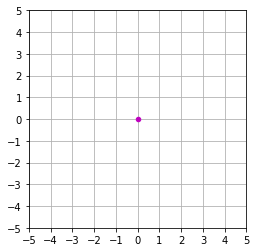

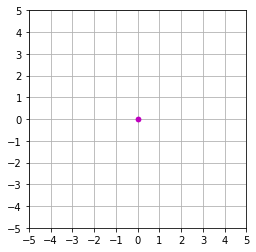

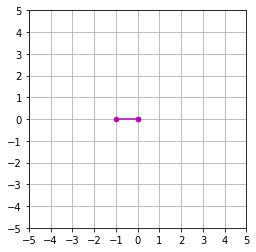

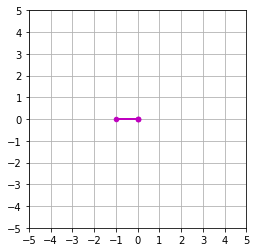

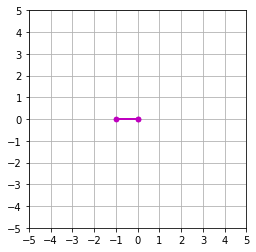

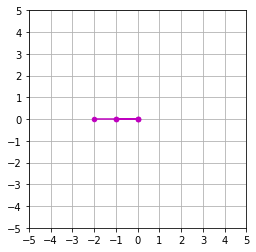

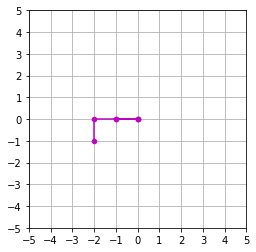

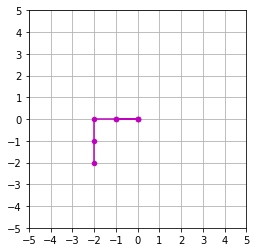

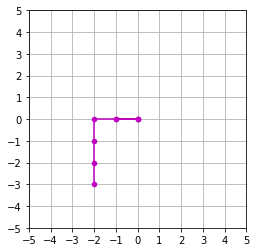

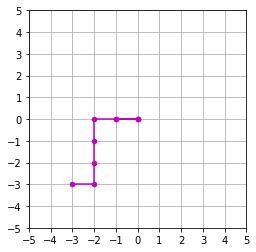

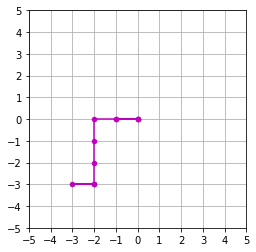

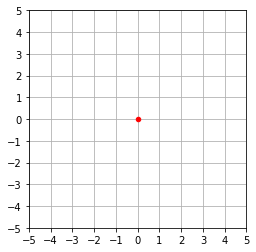

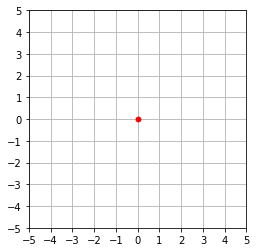

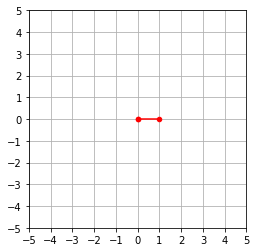

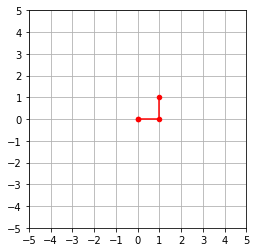

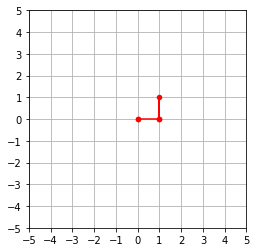

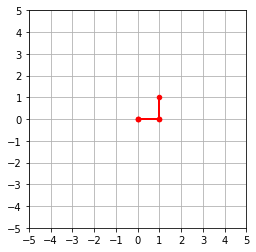

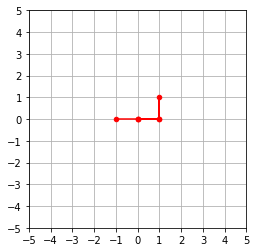

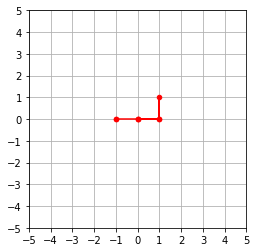

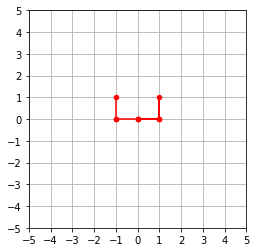

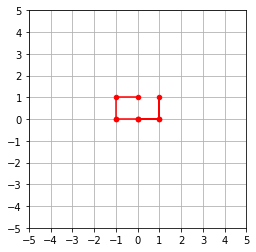

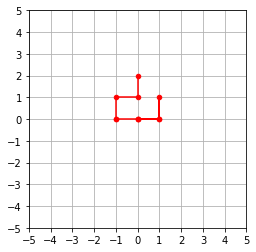

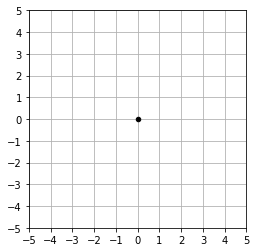

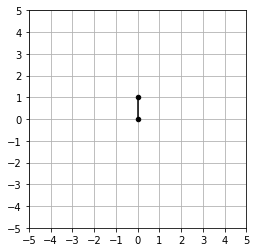

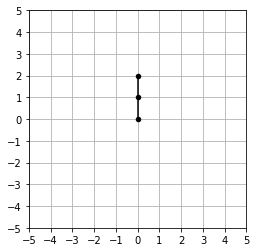

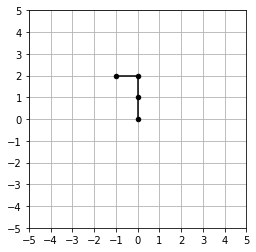

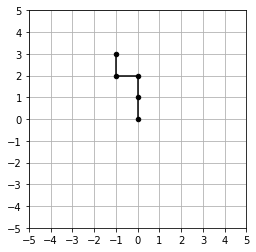

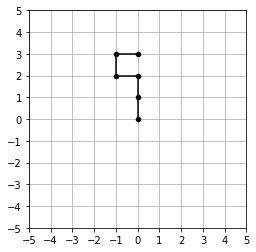

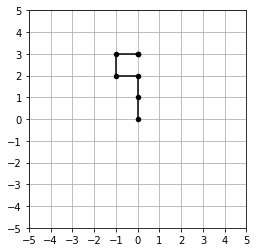

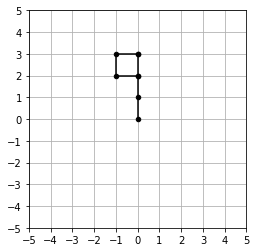

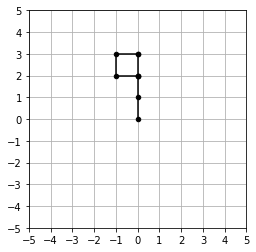

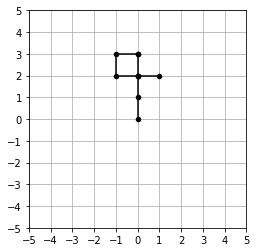

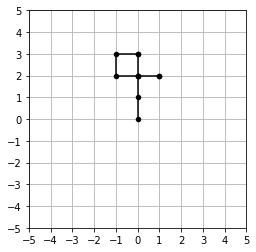

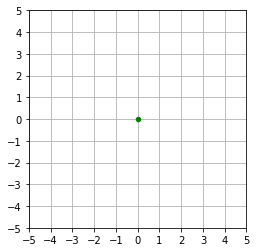

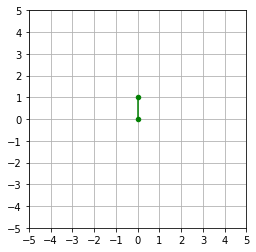

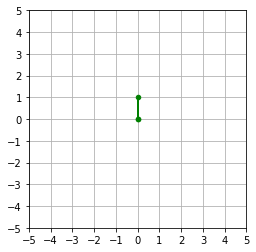

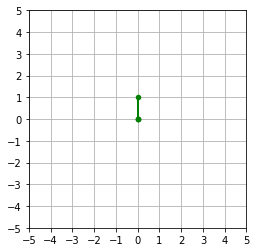

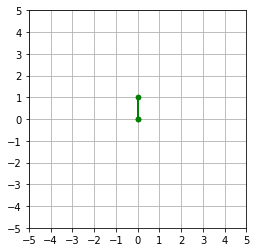

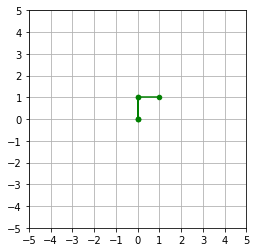

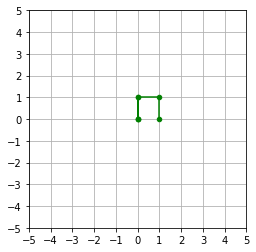

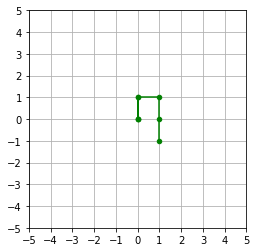

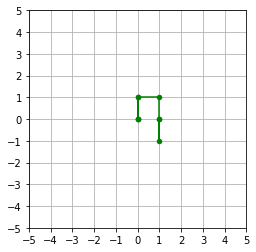

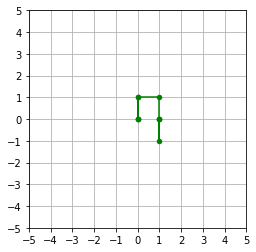

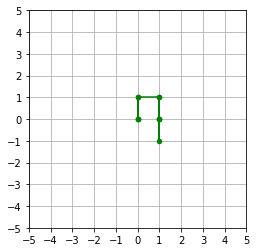

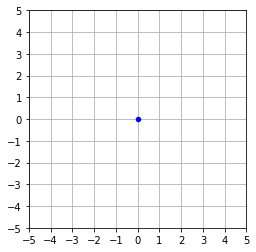

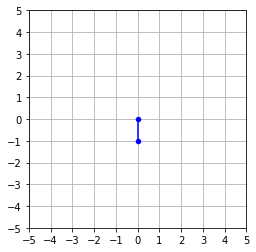

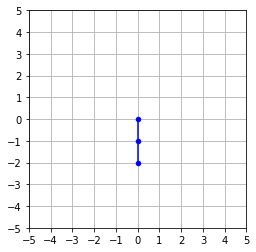

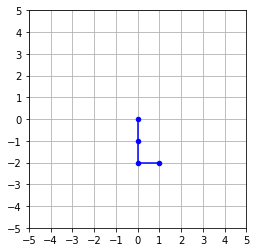

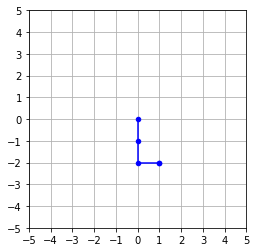

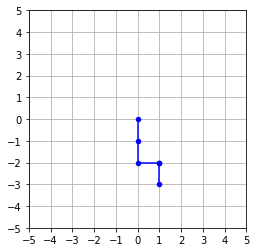

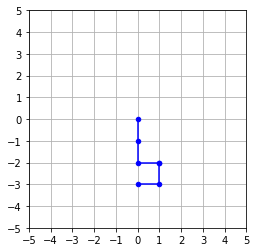

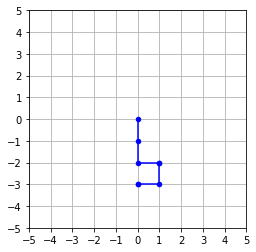

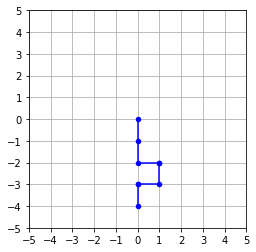

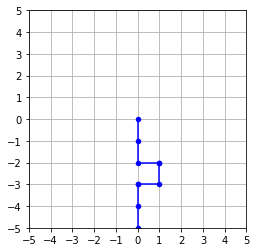

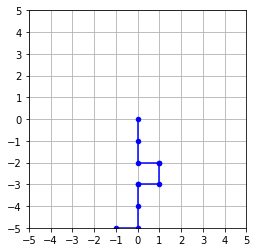

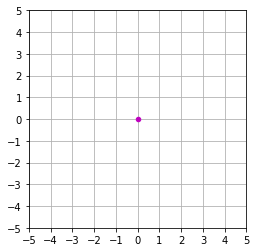

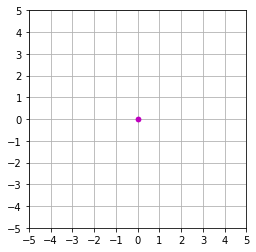

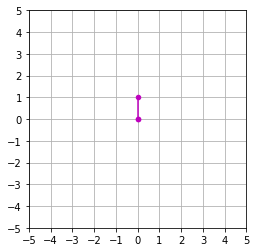

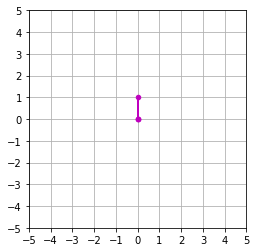

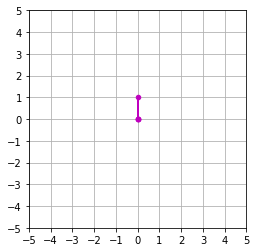

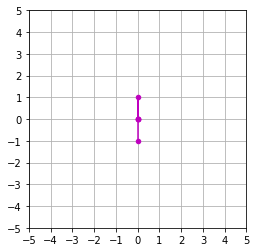

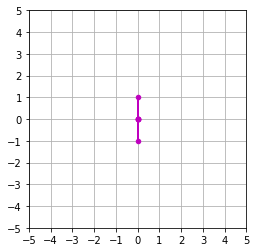

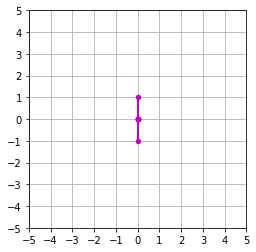

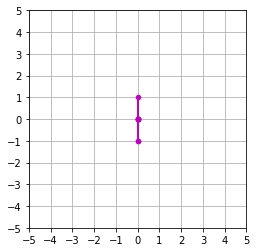

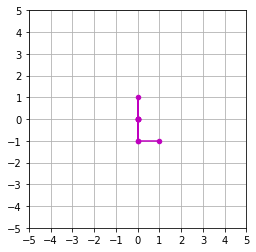

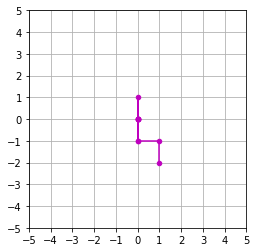

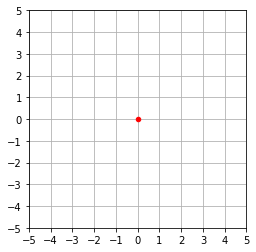

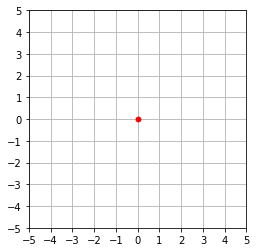

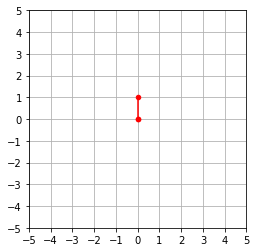

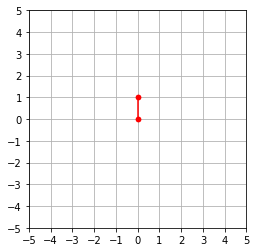

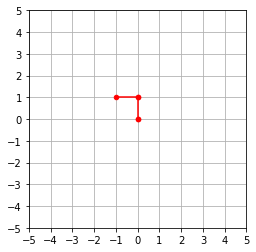

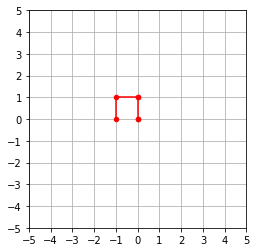

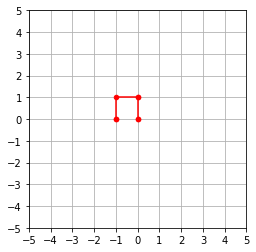

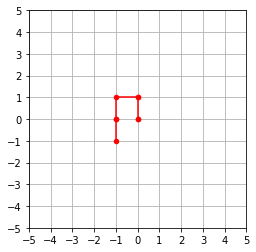

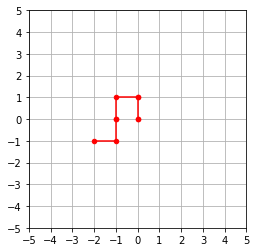

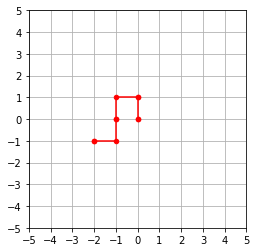

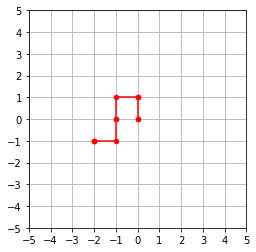

In [3]:
import random
colors=['k','g','b','m','r','k','g','b','m','r','k','g','b','m','r','k','g','b','m','r']
frame=0
for i in range(10):
    col=colors[i]#"#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    x=0.0
    y=0.0
    xs=[x]
    ys=[x]
    for _ in range(11):
        plt.figure()
        plt.plot(xs,ys,'o-',ms=4.5,lw=1.5,color=col)
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
        plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
        plt.grid('both')
        plt.gca().set_aspect('equal', adjustable='box')
#        plt.savefig('randomwalk_frame%03d.png'%frame,dpi=150)
        plt.show()
        frame+=1
        vxvy=stepchoice[np.random.randint(low=0,high=5)] #high exclusive
        x=x+dt*vxvy[0]
        y=y+dt*vxvy[1]
        xs.append(x)
        ys.append(y)
